# **Assignment 2**

# **Statistical Treatment for Retail Datasets**
Tegar Ahmad Arsy
PYTN-KS07-020



In [105]:
#import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm




In [22]:
#membaca file
df = pd.read_csv('nyc-rolling-sales.csv', skipinitialspace=True)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [23]:
df.shape

(84548, 22)

In [24]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,0.0,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,NaN,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,NaN,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,NaN,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,NaN,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,NaN,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,NaN,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [26]:
df.isnull().sum().sort_values()

Unnamed: 0                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
COMMERCIAL UNITS                      0
RESIDENTIAL UNITS                     0
ZIP CODE                              0
SALE DATE                             0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
BOROUGH                               0
SALE PRICE                            0
BUILDING CLASS AT PRESENT           738
TAX CLASS AT PRESENT                738
APARTMENT NUMBER                  65496
EASE-MENT                         84548
dtype: int64

In [27]:
# Mengahpus kolom yang tidak diperlukan dalam perhitungan

df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('EASE-MENT', axis=1, inplace=True)
df.drop(labels=['ADDRESS','APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)


In [28]:
# Merubah tipe data kolom yang tidak sesuai

df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')



In [31]:
# Merubah tipe data menjadi kategorial

categorical = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
         'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

In [33]:
# Mengendalikan duplikasi data dalam dataset

df.duplicated().sum()

959

In [36]:
df = df.drop_duplicates(df.columns, keep ='last')

df.duplicated().sum()

0

In [38]:
missing_value = df.isnull().sum()/len(df)*100
print(pd.DataFrame([missing_value[missing_value>0], pd.Series(df.isnull().sum()[df.isnull().sum()>1000])],
                  index=['percent missing', 'num of missing']))

                 TAX CLASS AT PRESENT  BUILDING CLASS AT PRESENT  \
percent missing              0.882891                   0.882891   
num of missing                    NaN                        NaN   

                 LAND SQUARE FEET  GROSS SQUARE FEET    SALE PRICE  
percent missing          31.04954          32.638266     16.837144  
num of missing        25954.00000       27282.000000  14074.000000  


In [54]:
df['SALE PRICE'].describe()


count    6.951500e+04
mean     1.282005e+06
std      1.143784e+07
min      0.000000e+00
25%      2.300000e+05
50%      5.345810e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [55]:
# Menghilangkan semua value yang mengandung null
df = df[df['SALE PRICE'].notnull()]
df = df[df['LAND SQUARE FEET'].notnull()]
df = df[df['GROSS SQUARE FEET'].notnull()]

<Figure size 864x360 with 0 Axes>

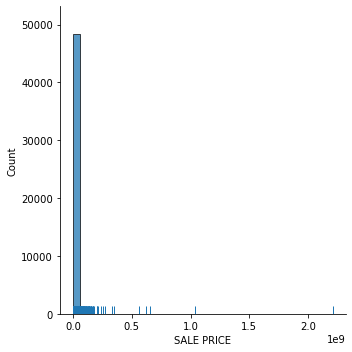

In [56]:
plt.figure(figsize=(12,5))
sns.displot(df_land['SALE PRICE'], bins=40, rug=True)
plt.show()

<Figure size 864x360 with 0 Axes>

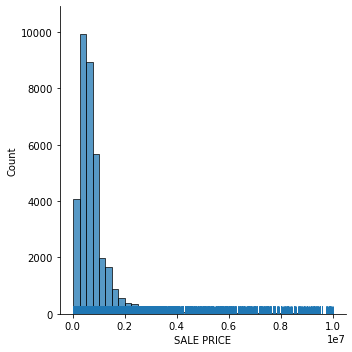

In [57]:
df2 = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)]

plt.figure(figsize=(12,5))
sns.displot(df2['SALE PRICE'], bins=40, rug=True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13068\3921481126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LOG_PRICE'] = np.log(df2['SALE PRICE'])


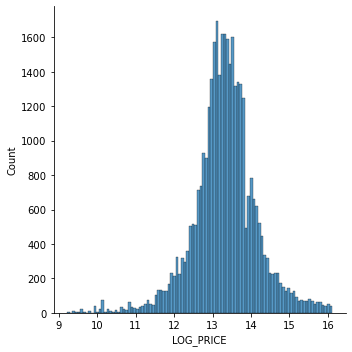

In [58]:
df2['LOG_PRICE'] = np.log(df2['SALE PRICE'])
sns.displot(df2['LOG_PRICE'], bins=100)

In [59]:
print(df2['LOG_PRICE'].skew())

-0.26418219250538066


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36181 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         36181 non-null  int64         
 1   NEIGHBORHOOD                    36181 non-null  category      
 2   BUILDING CLASS CATEGORY         36181 non-null  category      
 3   TAX CLASS AT PRESENT            35909 non-null  category      
 4   BLOCK                           36181 non-null  int64         
 5   LOT                             36181 non-null  int64         
 6   BUILDING CLASS AT PRESENT       35909 non-null  category      
 7   RESIDENTIAL UNITS               36181 non-null  int64         
 8   COMMERCIAL UNITS                36181 non-null  int64         
 9   TOTAL UNITS                     36181 non-null  int64         
 10  LAND SQUARE FEET                36181 non-null  float64       
 11  GR

## Measure of Central Tendency : Mean

In [62]:
mean = df2['SALE PRICE'].mean()
print(mean)

879677.2472292087


## Measure of Central Tendency : Median

In [68]:
median = df2['SALE PRICE'].median()
median

610000.0

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


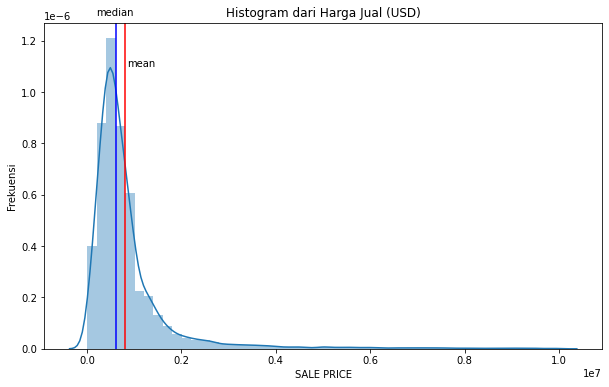

In [69]:
#let's take a look distribution of the data, the data is skewness or normal distribution
plt.figure(figsize=(10,6))
sns.distplot(df2['SALE PRICE'])
plt.title('Histogram dari Harga Jual (USD)')
plt.ylabel("Frekuensi")
plt.axvline(df2[(df2['SALE PRICE']>100000) & (df2['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(df2[(df2['SALE PRICE']>100000) & (df2['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(200000,0.0000013, "median")
plt.text(850000,0.0000011, "mean")
plt.show()

## Measure of Central Tendency : Modus

In [95]:
neighborhood = df2['NEIGHBORHOOD'].value_counts()
neighborhood


BEDFORD STUYVESANT    863
FLUSHING-NORTH        769
EAST NEW YORK         671
SHEEPSHEAD BAY        649
BOROUGH PARK          606
                     ... 
EAST RIVER              0
PELHAM BAY              0
ROOSEVELT ISLAND        0
BLOOMFIELD              0
SOUTHBRIDGE             0
Name: NEIGHBORHOOD, Length: 254, dtype: int64

## Measure of Central Tendency : Range


In [83]:
range = neighborhood.max() - neighborhood.min()
range

863

## Measure of Central Tendency : Range


In [84]:
var = df2['SALE PRICE'].var()
var

1066425877999.0579

## Measure of Central Tendency : Range


In [85]:
standar = df2['SALE PRICE'].std()

print(standar)

1032678.9810967675


## Probability Distribution

In [97]:
p_bp = neighborhood['BOROUGH PARK']/neighborhood.sum()
p_bp

0.01674912246759349

## Convidence Interval

In [101]:
n = neighborhood.sum()
n

36181

In [102]:
se_bp = np.sqrt(p_bp * (1-p_bp) / n)
se_bp

0.0006746645910699454

In [103]:
z_score = 1.96

lcb = p_bp - z_score * se_bp #lower limit dari CI
ucb = p_bp + z_score * se_bp #upper limit dari CI

lcb,ucb

(0.015426779869096397, 0.018071465066090583)

Dengan cara lain

In [106]:
sm.stats.proportion_confint(n * p_bp, n)


(0.015426804167451954, 0.018071440767735026)

## Hypotesis Testing

In [108]:
df2['BOROUGH'] = df2['BOROUGH'].astype(str)
df2['BOROUGH'] = df2['BOROUGH'].str.replace("1", "Manhattan")
df2['BOROUGH'] = df2['BOROUGH'].str.replace("2", "Bronx")
df2['BOROUGH'] = df2['BOROUGH'].str.replace("3", "Brooklyn")
df2['BOROUGH'] = df2['BOROUGH'].str.replace("4", "Queens")
df2['BOROUGH'] = df2['BOROUGH'].str.replace("5", "Staten Island")

df2

C:\Users\user\AppData\Local\Temp\ipykernel_13068\1779238035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BOROUGH'] = df2['BOROUGH'].astype(str)
C:\Users\user\AppData\Local\Temp\ipykernel_13068\1779238035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BOROUGH'] = df2['BOROUGH'].str.replace("1", "Manhattan")
C:\Users\user\AppData\Local\Temp\ipykernel_13068\1779238035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,LOG_PRICE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,15.706361
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,15.185745
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,15.894952
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,14.976421
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,15.009433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,2,0,2,11088.0,2160.0,1994,1,B2,648000.0,2016-12-07,13.381646
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,13.017003
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,13.217674
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,13.038982


In [109]:
df_borough = df2.groupby('BOROUGH', axis=0).sum()

df_borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,LOG_PRICE
BOROUGH,,,,,,,,,,
Bronx,20929685,1487147,10683,526,11212,13502440.0,12851539.0,8833109,2.923204e+09,63169.173827
Brooklyn,63463621,5690738,23744,1428,25375,23991850.0,24391594.0,26728528,1.562624e+10,203589.977077
Manhattan,876068,32354,7358,543,7894,2204614.0,10866383.0,1160509,2.638975e+09,9004.625369
Queens,85826759,579994,20866,3417,24275,40616295.0,26792130.0,20701090,8.010454e+09,142267.883682
Staten Island,16527557,402935,6651,478,7123,28930572.0,11450310.0,9640993,2.628729e+09,64033.468442


Dengan melihat data diatas, apakah harga rata rata per unit pada borough Staten Island lebih besar secara signifikan daripada Bronx?

* h0 = Tidak ada perbedaan secara signifikan pada harga rata rata perunit antara borough Staten Island dan Bronx
* h1 = Terdapat perbedaan secara signifikan pada harga rata rata per unit antara borugh Staten Island dan Bronx

In [110]:
Queens = df2[df2['BOROUGH']=='Queens']
Staten_Island = df2[df2['BOROUGH']=='Staten Island']

In [111]:
total_unit_Queens = df_borough.iloc[-2, 4]
mu_Queens = Queens['SALE PRICE'].mean()
std_Queens = Queens['SALE PRICE'].std()
total_unit_Queens, mu_Queens, std_Queens

(24275, 750112.7335892874, 654002.800822839)

In [112]:
total_unit_SI = df_borough.iloc[-1, 4]
mu_SI = Staten_Island['SALE PRICE'].mean()
std_SI = Staten_Island['SALE PRICE'].std()
total_unit_SI, mu_SI, std_SI

(7123, 536475.3889795919, 384864.9996818924)

In [113]:
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(Staten_Island['SALE PRICE'],Queens['SALE PRICE'])
print("pval: ",float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pval:  4.020264308860225e-100
reject null hypothesis


Dengan hasil ini dapat ditarik kesimpulan bahwa terdapat perbedaan yang cukup signifikan pada harga rata-rata per unit antara Borough Staten Island dengan Queens